# Week 1 Assignment


# Signal Representation and Sampling

1) Generate a sine wave of frequency 10 Hz with:
Duration = 2seconds and
Sampling rate = 500 Hz.

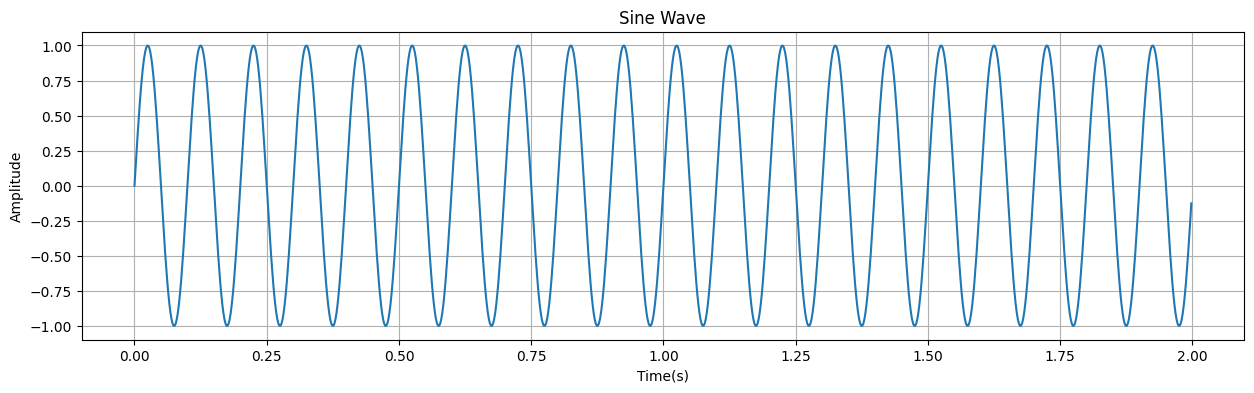

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

frequency = 10
duration = 2
sampling_rate = 500

t = np.linspace(0,duration,int(duration * sampling_rate),endpoint=False)
sine_wave = np.sin(2 * np.pi * frequency * t)

plt.figure(figsize=(15, 4))
plt.plot(t,sine_wave)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.grid(True)
plt.show()

2) Plot the continuous signal and a discretized version sampled at 40 Hz.

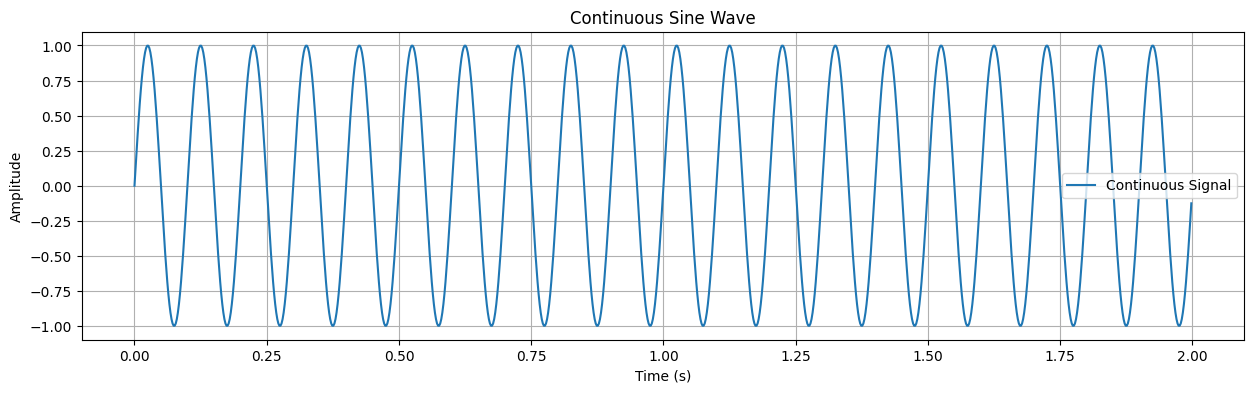

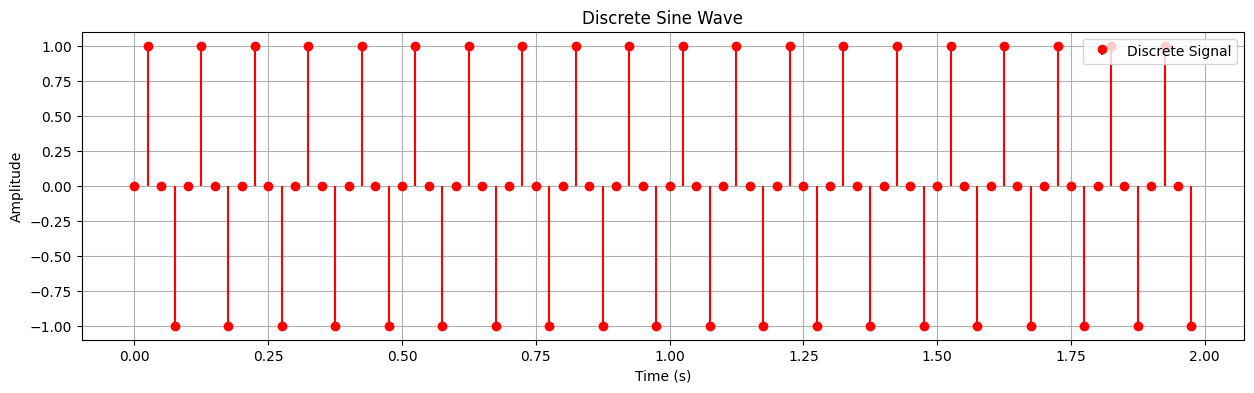

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(t, sine_wave, label="Continuous Signal")
plt.title("Continuous Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


sampling_rate_discrete = 40
time_discrete = np.linspace(0, duration, int(sampling_rate_discrete * duration), endpoint=False)
sine_wave_discrete = np.sin(2 * np.pi * frequency * time_discrete)

plt.figure(figsize=(15, 4))
plt.stem(time_discrete, sine_wave_discrete, linefmt='r-', markerfmt='ro', basefmt=" ", label="Discrete Signal")
plt.title("Discrete Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

3) Experiment: Vary the sampling rate (e.g., 20 Hz, 50 Hz, 100 Hz) and observe the effect on the discrete signal.


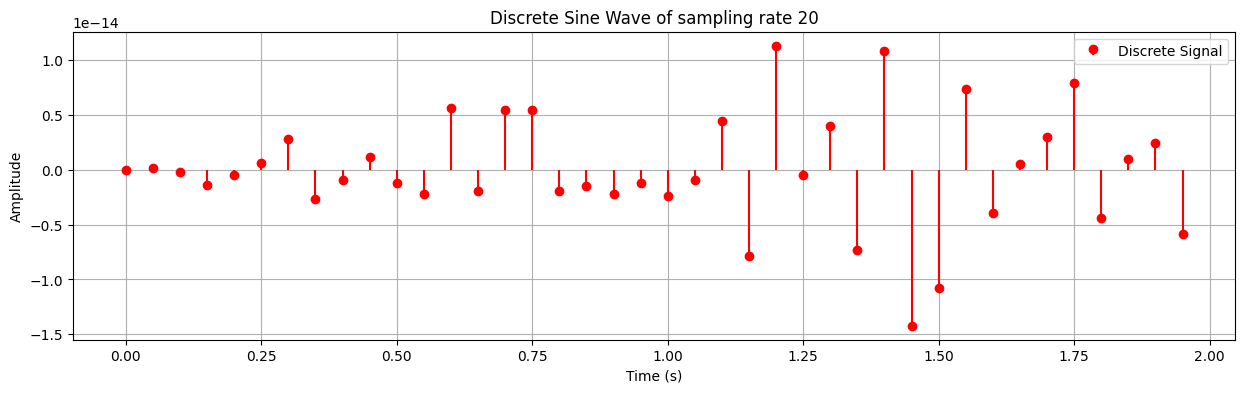

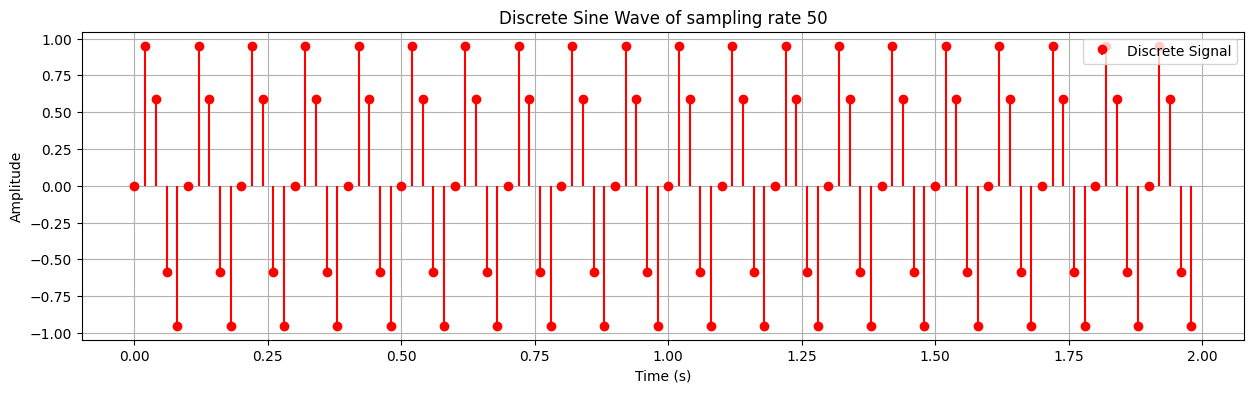

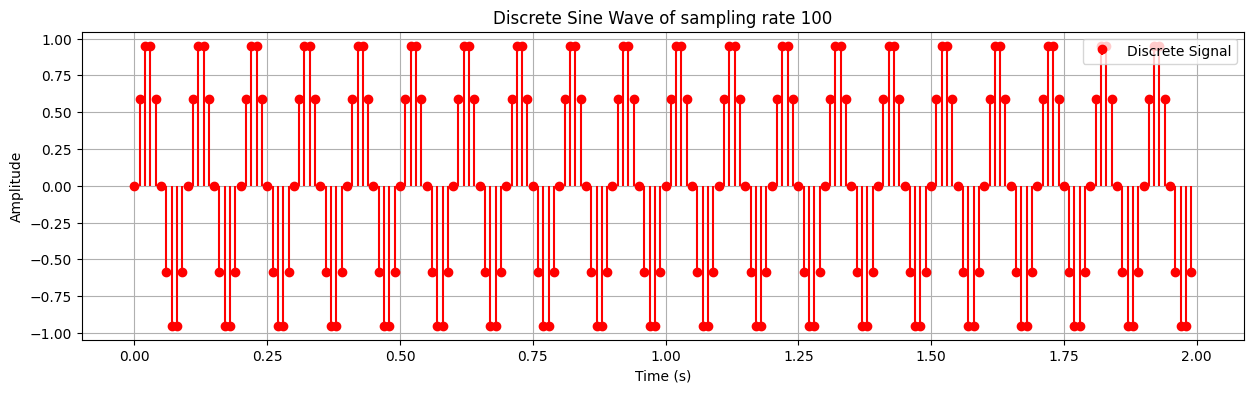


    Observations:
    - As the sampling rate increases number of points in the discrete sine wave increases. Eventually it almost becoming continuous at certain large sampling rate.
    


In [ ]:
sampling_rate_variable = [20,50,100]

for rate in sampling_rate_variable:
    time_continuous = np.linspace(0,duration,int(duration * rate),endpoint=False)
    sine_wave_continuous = np.sin(2 * np.pi * frequency * time_continuous)

    plt.figure(figsize=(15, 4))
    plt.stem(time_continuous, sine_wave_continuous, linefmt='r-', markerfmt='ro', basefmt=" ", label="Discrete Signal")
    plt.title(f"Discrete Sine Wave of sampling rate {rate}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
plt.show()

print(
    """
    Observations:
    - As the sampling rate increases number of points in the discrete sine wave increases. Eventually it almost becoming continuous at certain large sampling rate.
    """
)


# Fourier Transform and Frequency Domain Analysis

1) Generate a composite signal by summing two sine waves with frequencies 5 Hz and 20 Hz.

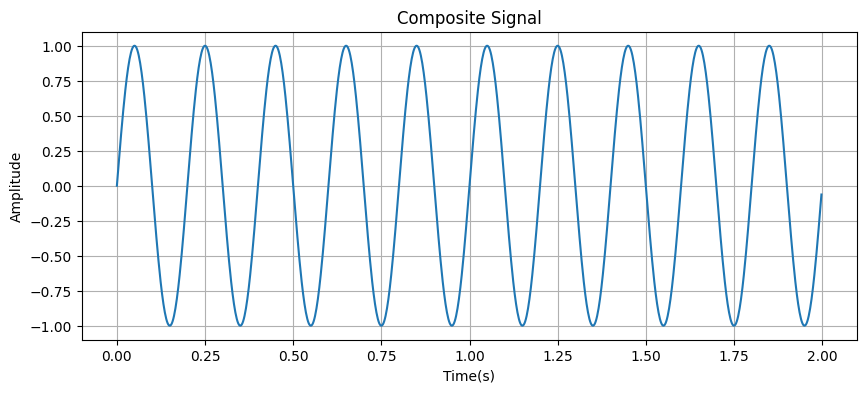

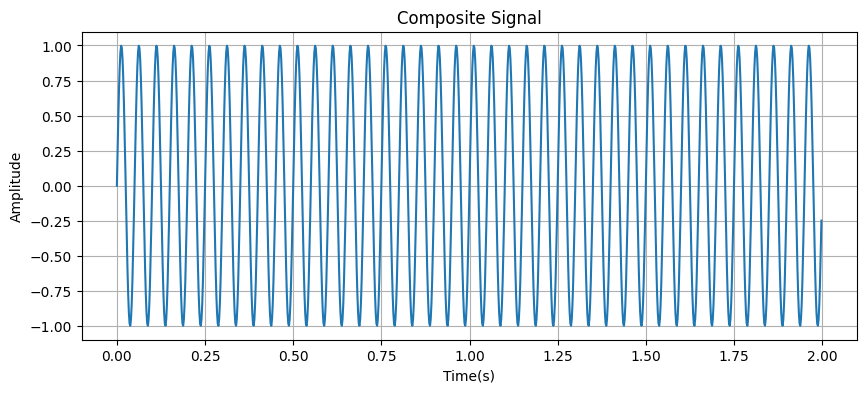

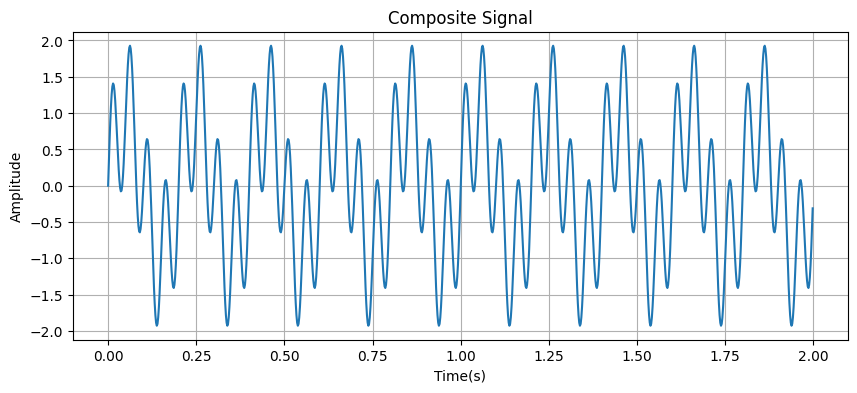

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

frequency_1 = 5
frequency_2 = 20
duration = 2
sampling_rate = 500

t = np.linspace(0,duration,int(duration * sampling_rate),endpoint=False)
sine_wave_1 = np.sin(2 * np.pi * frequency_1 * t)
sine_wave_2 = np.sin(2 * np.pi * frequency_2 * t)

composite_signal = sine_wave_1 + sine_wave_2

plt.figure(figsize=(10, 4))
plt.plot(t,sine_wave_1)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Composite Signal')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t,sine_wave_2)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Composite Signal')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t,composite_signal)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Composite Signal')
plt.grid(True)
plt.show()

2) Perform the Fourier Transform (FT) on the composite signal,
plot the magnitude spectrum and identify the prominent frequency components.

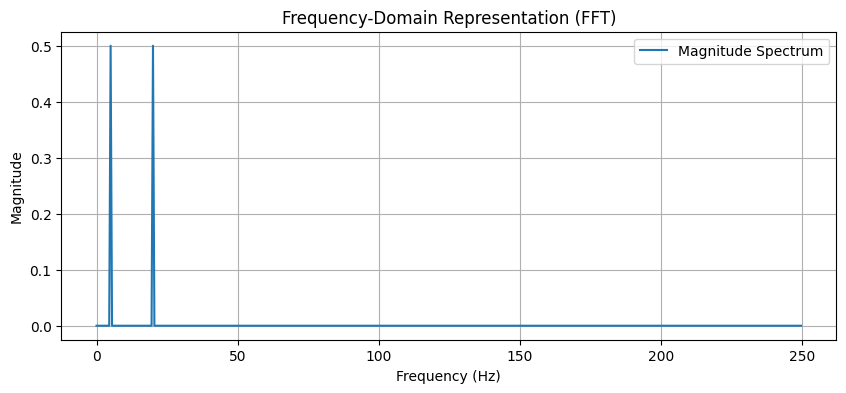


    Observations:
    - there are only two prominent frequency components.those are 20 Hz and 5 Hz.
    


In [ ]:
n = len(composite_signal)
fft_values = np.fft.fft(composite_signal)
frequency_axis = np.fft.fftfreq(n, 1 / sampling_rate)


positive_freqs = frequency_axis[:n // 2]
magnitude_spectrum = np.abs(fft_values[:n // 2]) / n


plt.figure(figsize=(10, 4))
plt.plot(positive_freqs, magnitude_spectrum, label="Magnitude Spectrum")
plt.title("Frequency-Domain Representation (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()

print(
    """
    Observations:
    - there are only two prominent frequency components.those are 20 Hz and 5 Hz.
    """
)


# Audio Signal Analysis

1) Upload like 5 audio but belonging to the same category, like animals, music instruments and stuff (e.g.wav or .mp3) and load it using librosa.

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

import librosa

audio_data1, sr1 = librosa.load('trumpet-75426.mp3', sr=None)
audio_data2, sr2 = librosa.load('relaxing-guitar-loop-v5-245859.mp3', sr=None)
audio_data3, sr3 = librosa.load('trap-drums-145bpm-f-minor-270347.mp3', sr=None)
audio_data4, sr4 = librosa.load('marie-louise-janneman-acoustic-piano-loop-190241.mp3', sr=None)
audio_data5, sr5 = librosa.load('collage-sankar-63736.mp3', sr=None)



Saving collage-sankar-63736.mp3 to collage-sankar-63736.mp3
Saving marie-louise-janneman-acoustic-piano-loop-190241.mp3 to marie-louise-janneman-acoustic-piano-loop-190241.mp3
Saving trap-drums-145bpm-f-minor-270347.mp3 to trap-drums-145bpm-f-minor-270347.mp3
Saving relaxing-guitar-loop-v5-245859.mp3 to relaxing-guitar-loop-v5-245859.mp3
Saving trumpet-75426.mp3 to trumpet-75426.mp3


2) Plot the waveform of the audio signal.

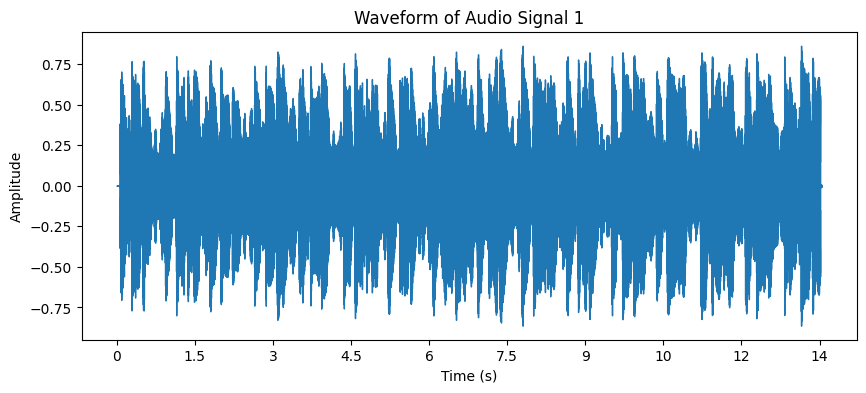

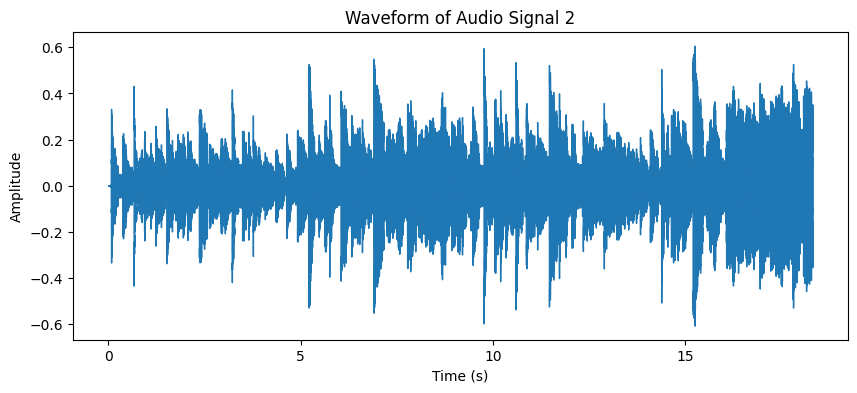

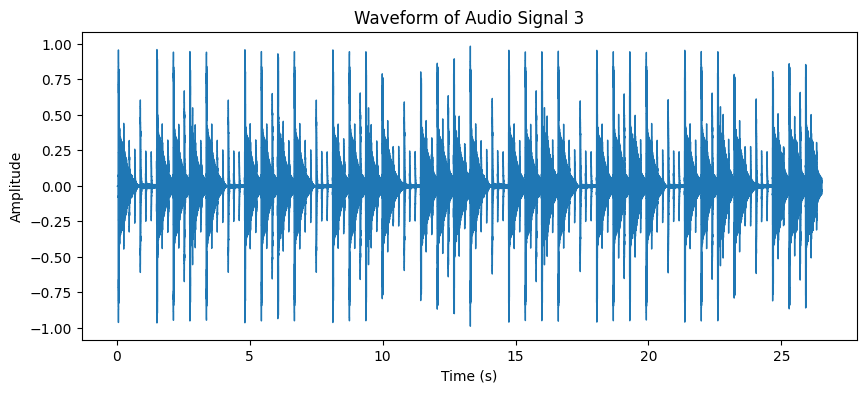

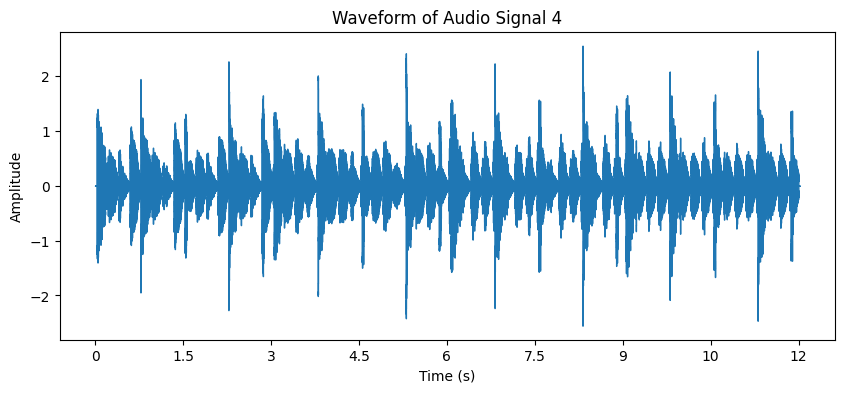

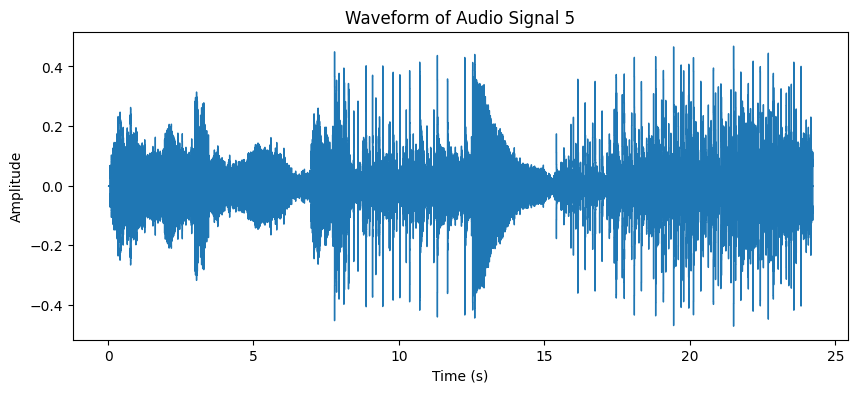

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

audio_data = [audio_data1,audio_data2,audio_data3,audio_data4,audio_data5]
sr = [sr1,sr2,sr3,sr4,sr5]

for i in range(5):
  plt.figure(figsize=(10, 4))
  librosa.display.waveshow(audio_data[i], sr=sr[i])
  plt.title(f'Waveform of Audio Signal {i+1}')
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.show()
#Displays the waveform of the audio signal

3) Perform the Fourier Transform (FT) and plot the magnitude spectrum.

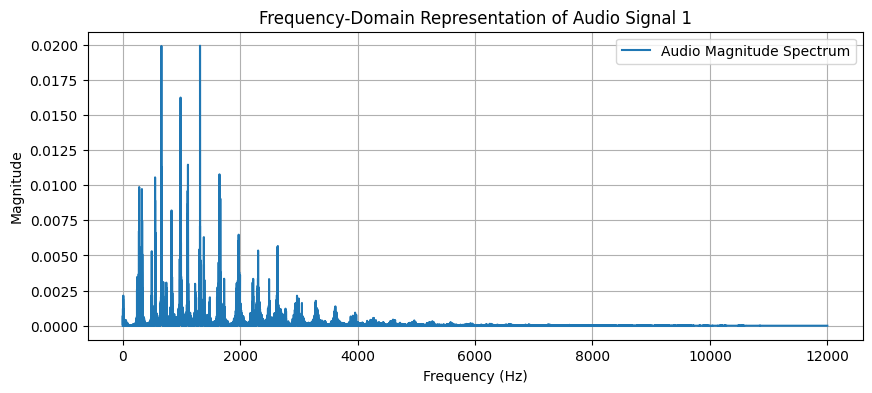

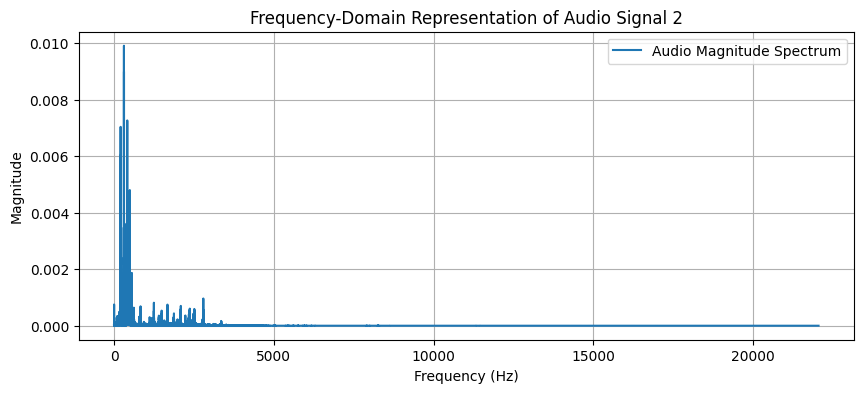

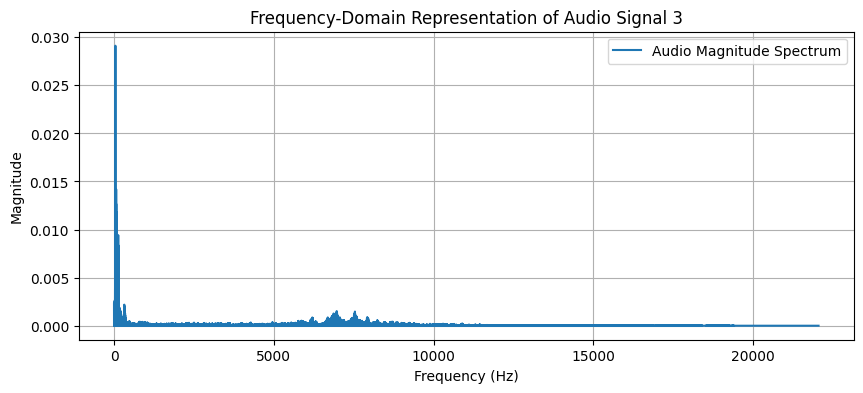

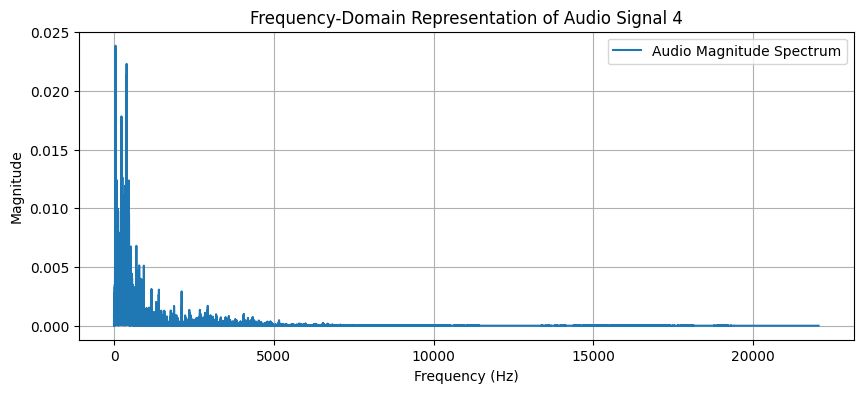

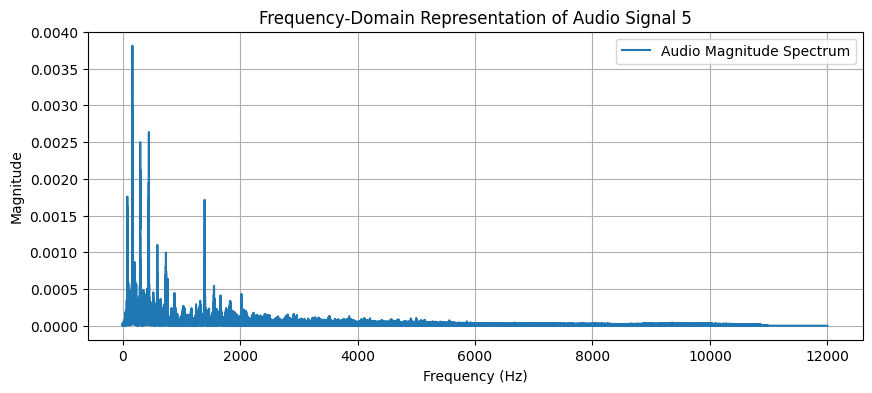

In [ ]:
import numpy as np
for i in range(5):
  n_audio = len(audio_data[i])
  fft_audio = np.fft.fft(audio_data[i])
  frequency_axis_audio = np.fft.fftfreq(n_audio, 1 / sr[i])

  positive_freqs_audio = frequency_axis_audio[:n_audio // 2]
  magnitude_spectrum_audio = np.abs(fft_audio[:n_audio // 2]) / n_audio

  plt.figure(figsize=(10, 4))
  plt.plot(positive_freqs_audio, magnitude_spectrum_audio, label="Audio Magnitude Spectrum")
  plt.title(f"Frequency-Domain Representation of Audio Signal {i+1}")
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Magnitude")
  plt.grid(True)
  plt.legend()
plt.show()

4) Compute and visualize the STFT for the audio signal using scipy.signal.stft.

Experiment with different window sizes (e.g., 256, 1024, 4096).
Discuss the trade-off between time and frequency resolution.

In [ ]:
from scipy.signal import stft
window_sizes = [256, 1024, 4096]

for j in range(5):
 plt.figure(figsize=(15, 10))
 for i, window_size in enumerate(window_sizes, 1):
    f, t, Zxx = stft(audio_data[j], fs=sr[j], nperseg=window_size)  # Compute STFT

    magnitude = np.abs(Zxx)


    plt.subplot(len(window_sizes), 1, i)
    plt.pcolormesh(t, f, 20 * np.log10(magnitude), shading='gouraud')  # Log scale for better visualization
    plt.title(f"STFT Magnitude Spectrum {j+1} (Window Size: {window_size})")
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Time (s)")
    plt.colorbar(label="Magnitude (dB)")

 plt.tight_layout()
 plt.show()



print(
    """
    Observations:
    - Smaller window size (e.g., 256): Better time resolution but poor frequency resolution.
    - Larger window size (e.g., 4096): Better frequency resolution but poor time resolution.
    - Trade-off: Choose window size based on whether time or frequency resolution is more important for your analysis.
    """
)

Output hidden; open in https://colab.research.google.com to view.

# Spectrogram Visualization

1) Create spectrogram for the audio files uploaded  using librosa.display.specshow.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

audio_data1, sr1 = librosa.load('trumpet-75426.mp3', sr=None)
audio_data2, sr2 = librosa.load('relaxing-guitar-loop-v5-245859.mp3', sr=None)
audio_data3, sr3 = librosa.load('trap-drums-145bpm-f-minor-270347.mp3', sr=None)
audio_data4, sr4 = librosa.load('marie-louise-janneman-acoustic-piano-loop-190241.mp3', sr=None)
audio_data5, sr5 = librosa.load('collage-sankar-63736.mp3', sr=None)

audio_data = [audio_data1,audio_data2,audio_data3,audio_data4,audio_data5]
sr = [sr1,sr2,sr3,sr4,sr5]

for i in range(5):
  D = librosa.amplitude_to_db(librosa.stft(audio_data[i]), ref=np.max)
  #impliments stft gets signal frequencies over time, converts amplitude of those frequencies to decibels

  plt.figure(figsize=(12, 6))
  librosa.display.specshow(D, sr=sr[i], x_axis='time', y_axis='log')  # Log scale for frequency
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Spectrogram of {i+1} signal(Log scale)')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
plt.show()




Output hidden; open in https://colab.research.google.com to view.

2) Experiment with
logarithmic scaling for frequency and
different color maps for better visualization.

In [ ]:

  D = librosa.amplitude_to_db(librosa.stft(audio_data[0]), ref=np.max)

  plt.figure(figsize=(12, 6))
  librosa.display.specshow(D, sr=sr[0], x_axis='time', y_axis='log', cmap='magma')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Spectrogram {1}(Log scale, magma color map)')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.show()


  plt.figure(figsize=(12, 6))
  librosa.display.specshow(D, sr=sr[0], x_axis='time', y_axis='log', cmap='viridis')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Spectrogram {1}(Log scale, viridis color map)')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.show()

  plt.figure(figsize=(12, 6))
  librosa.display.specshow(D, sr=sr[0], x_axis='time', y_axis='log', cmap='cividis')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Spectrogram {1}(Log scale, cividis color map)')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.show()

  plt.figure(figsize=(12, 6))
  librosa.display.specshow(D, sr=sr[0], x_axis='time', y_axis='log', cmap='inferno')  # Use 'magma' color map
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Spectrogram {1}(Log scale, inferno color map)')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.show()

  plt.figure(figsize=(12, 6))
  librosa.display.specshow(D, sr=sr[0], x_axis='time', y_axis='log', cmap='plasma')  # Use 'magma' color map
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Spectrogram {1}(Log scale, plasma color map)')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

3) Discuss how the spectrogram helps visualize frequency changes over time.

In [ ]:


print(
    """Frequency Changes Over Time: By observing the patterns and variations in the spectrogram, we can identify how the frequencies in the signal change over time. For instance:

Frequency Shifts: A gradual change in color or intensity along the vertical axis indicates a shift in frequency over time. A rising pattern suggests an increasing frequency, while a falling pattern suggests a decreasing frequency.
Transient Events: Sudden bursts of energy at specific frequencies and times appear as bright spots or vertical lines on the spectrogram. These often represent transient events like drum hits or sharp sounds.
Harmonic Content: Multiple frequencies appearing together as horizontal lines or bands indicate harmonic content, which is common in musical instruments and speech.
Frequency Modulation: Variations in the intensity or color of a frequency band over time can suggest frequency modulation, where the frequency of a signal is intentionally varied.
       """
)

Frequency Changes Over Time: By observing the patterns and variations in the spectrogram, we can identify how the frequencies in the signal change over time. For instance:

Frequency Shifts: A gradual change in color or intensity along the vertical axis indicates a shift in frequency over time. A rising pattern suggests an increasing frequency, while a falling pattern suggests a decreasing frequency.
Transient Events: Sudden bursts of energy at specific frequencies and times appear as bright spots or vertical lines on the spectrogram. These often represent transient events like drum hits or sharp sounds.
Harmonic Content: Multiple frequencies appearing together as horizontal lines or bands indicate harmonic content, which is common in musical instruments and speech.
Frequency Modulation: Variations in the intensity or color of a frequency band over time can suggest frequency modulation, where the frequency of a signal is intentionally varied.
       


# Quantization

1) Simulate a 50 Hz sine wave sampled at 1000 Hz.

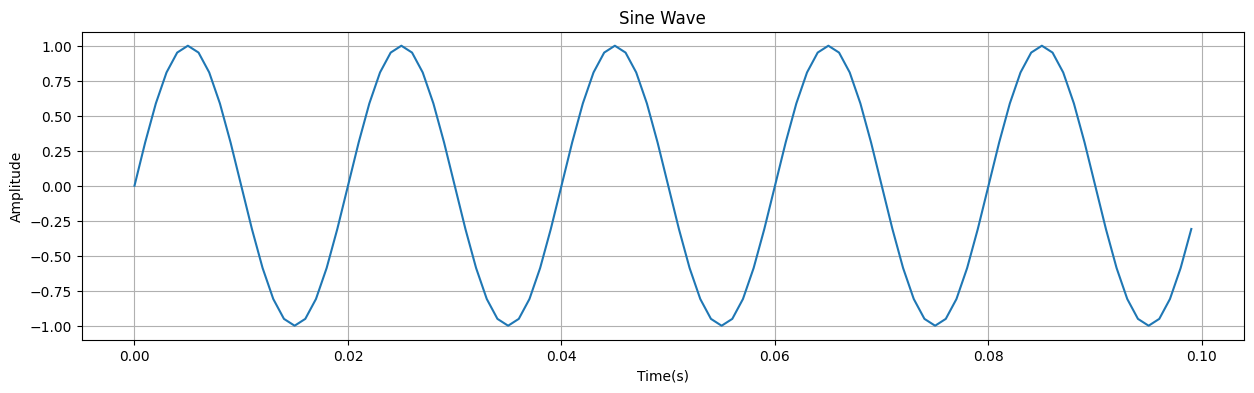

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

frequency = 50
duration = 0.1
sampling_rate = 1000

t = np.linspace(0,duration,int(duration * sampling_rate),endpoint=False)
sine_wave = np.sin(2 * np.pi * frequency * t)

plt.figure(figsize=(15, 4))
plt.plot(t,sine_wave)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.grid(True)
plt.show()

2) Quantize the signal with different bit depths (e.g., 8-bit, 4-bit).

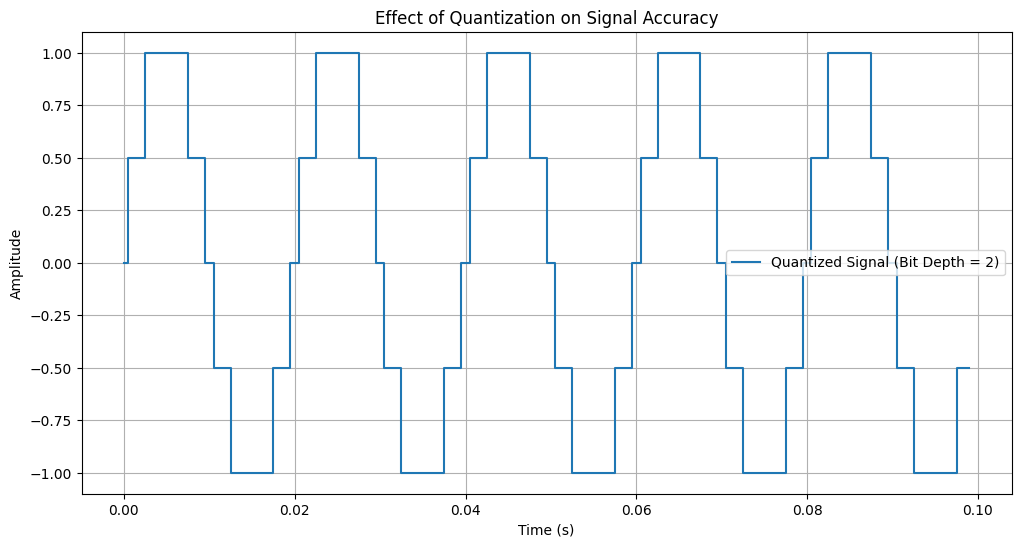

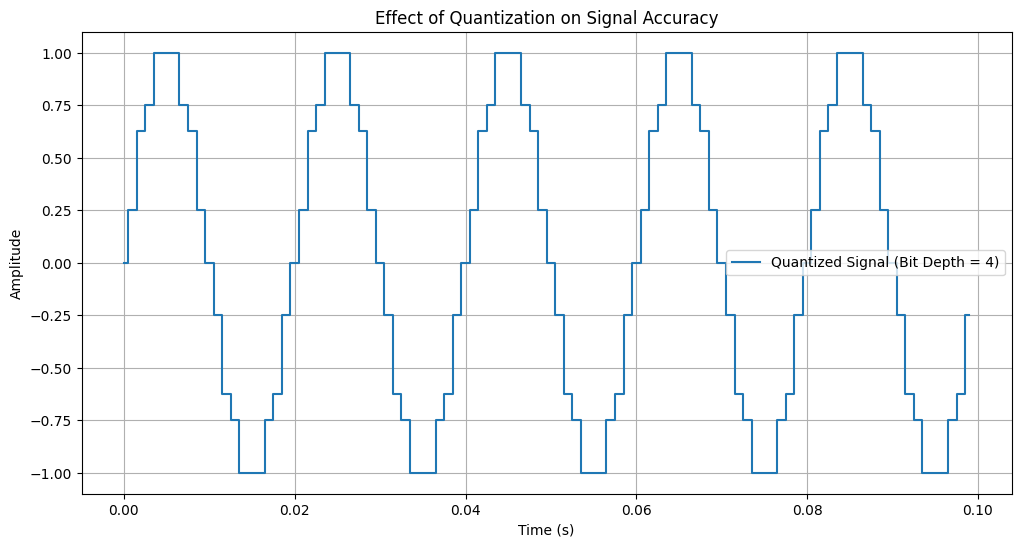

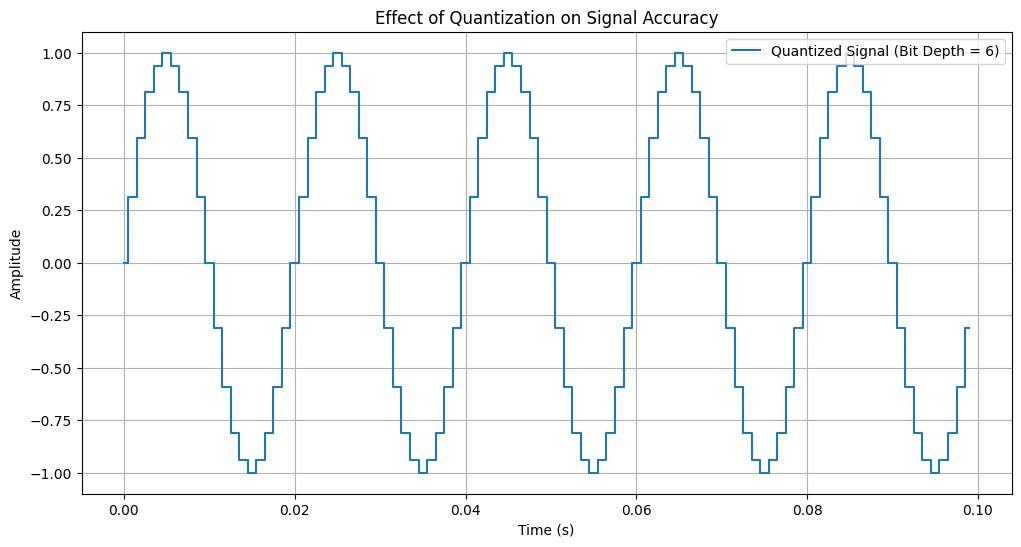

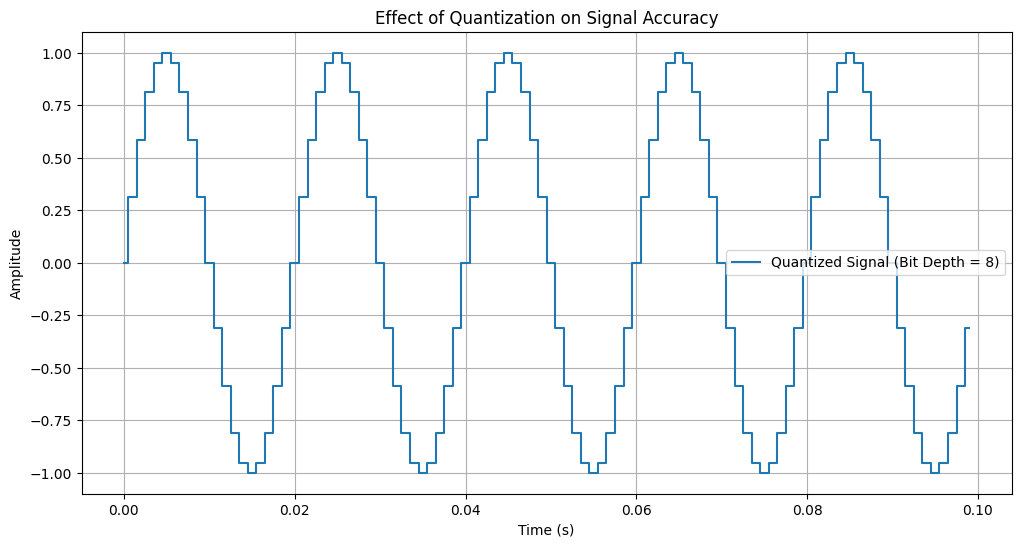

In [ ]:
time_quantized = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
signal_quantized = np.sin(2 * np.pi * frequency * time_quantized)


bit_depths = [2,4,6,8]
quantized_signals = {}

# Quantize the signal with different bit depths
for bit_depth in bit_depths:
    # Calculate the quantization step size
    step_size = 2 / (2 ** bit_depth)  # For a normalized signal between -1 and 1
    quantized_signal = np.round(signal_quantized / step_size) * step_size  # Quantize the signal
    quantized_signals[bit_depth] = quantized_signal

for bit_depth, quantized_signal in quantized_signals.items():
    plt.figure(figsize=(12, 6))



    plt.step(time_quantized, quantized_signal, label=f"Quantized Signal (Bit Depth = {bit_depth})", where='mid')

    plt.title("Effect of Quantization on Signal Accuracy")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
plt.show()

3) Plot and compare
the original signal and the
quantized signals for each bit depth.

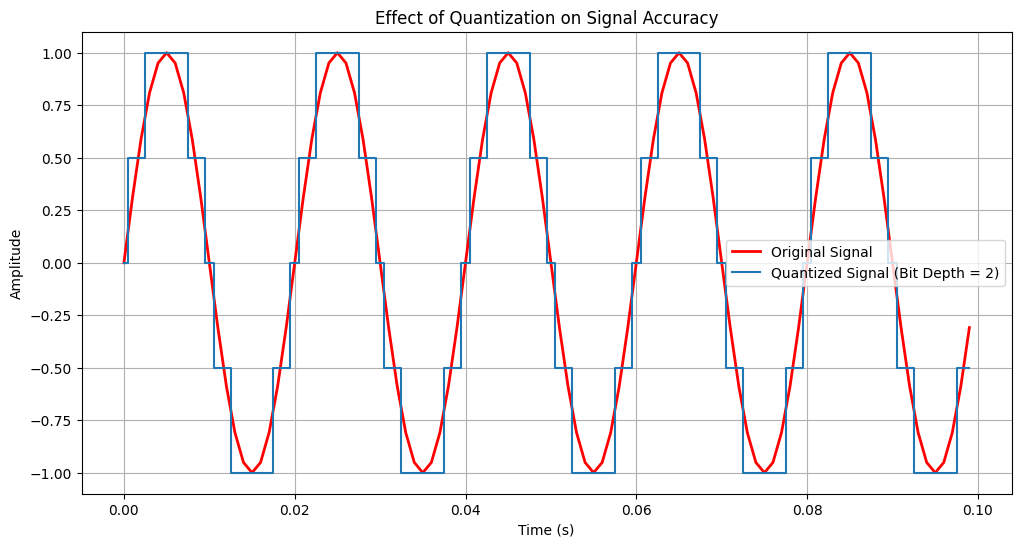

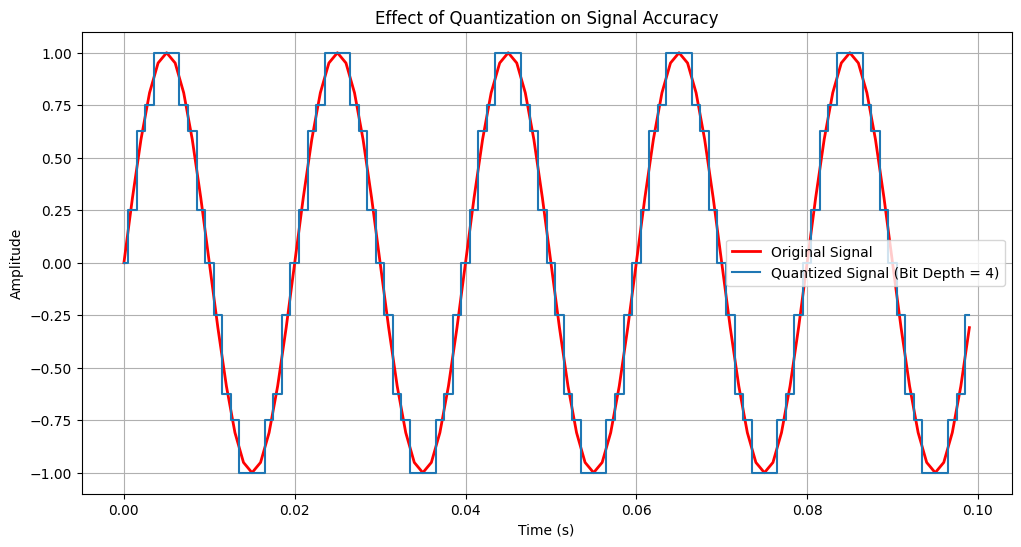

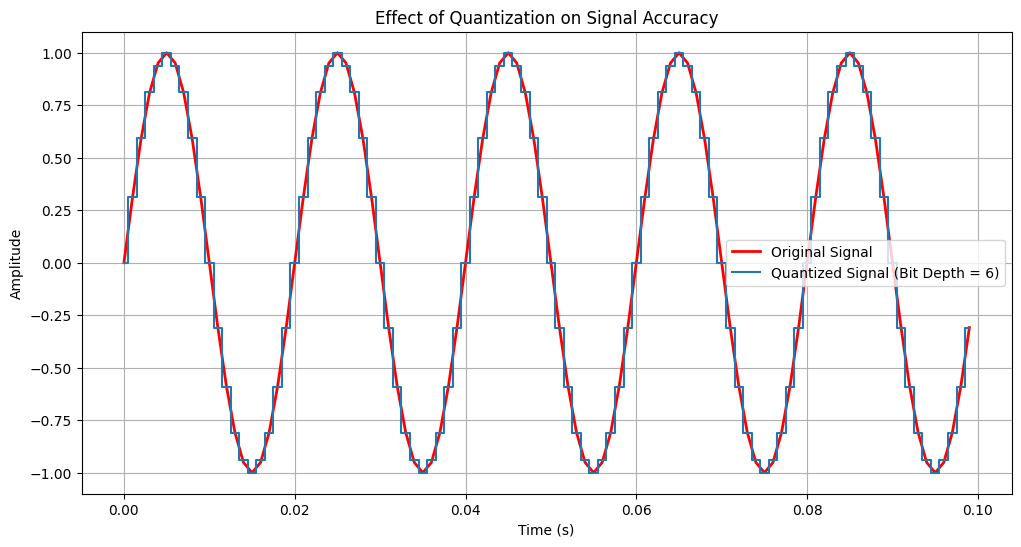

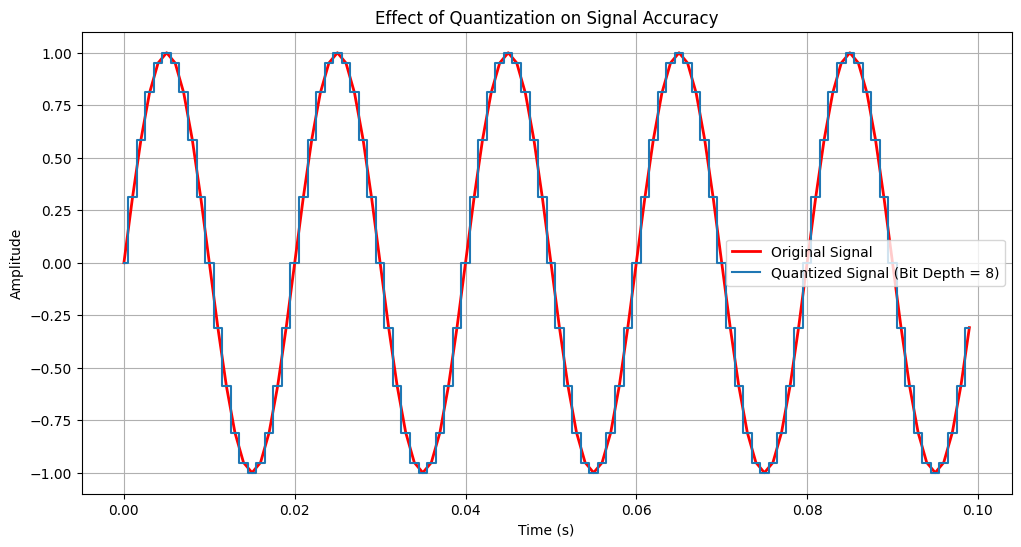

In [ ]:
for bit_depth, quantized_signal in quantized_signals.items():
    plt.figure(figsize=(12, 6))


    plt.plot(time_quantized, signal_quantized, label="Original Signal", color='red', lw=2)
    plt.step(time_quantized, quantized_signal, label=f"Quantized Signal (Bit Depth = {bit_depth})", where='mid')

    plt.title("Effect of Quantization on Signal Accuracy")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
plt.show()